# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())
EPL18

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
5,20170812,Southampton,Swansea,0,0,D
6,20170812,Watford,Liverpool,3,3,D
7,20170812,West Brom,Bournemouth,1,0,H
8,20170813,Man United,West Ham,4,0,H
9,20170813,Newcastle,Tottenham,0,2,A


## Step 2

In [3]:
EPL18['hwin'] = np.where(EPL18['FTR'] == 'H',1, np.where(EPL18['FTR'] == 'D',.5, 0))
EPL18['awin'] = np.where(EPL18['FTR'] == 'A',1, np.where(EPL18['FTR'] == 'D',.5, 0))
EPL18['count'] = 1
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwin,awin,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
5,20170812,Southampton,Swansea,0,0,D,0.5,0.5,1
6,20170812,Watford,Liverpool,3,3,D,0.5,0.5,1
7,20170812,West Brom,Bournemouth,1,0,H,1.0,0.0,1
8,20170813,Man United,West Ham,4,0,H,1.0,0.0,1
9,20170813,Newcastle,Tottenham,0,2,A,0.0,1.0,1


## Step 3

In [4]:
Half1 = EPL18[EPL18.Date < 20180000]
Half1h= Half1.groupby('HomeTeam')[['hwin','FTHG','FTAG','count']].sum().reset_index()
Half1h= Half1h.rename(columns = {'HomeTeam':'team', 'FTHG':'FTHG1h', 'FTAG':'FTAG1h', 'count':'P1h'})
Half1a = Half1.groupby('AwayTeam')[['awin','FTHG','FTAG','count']].sum().reset_index()
Half1a =Half1a.rename(columns = {'AwayTeam':'team', 'FTHG':'FTHG1a', 'FTAG':'FTAG1a', 'count':'P1a'})


## Step 4 (home team)

In [5]:
Half1 = pd.merge(Half1h, Half1a, on ='team')
Half1

,team,hwin,FTHG1h,FTAG1h,P1h,awin,FTHG1a,FTAG1a,P1a
0,Arsenal,8.5,25,10,10,5.0,16,13,11
1,Bournemouth,4.5,14,17,11,3.0,15,6,10
2,Brighton,5.5,10,12,10,3.0,13,5,11
3,Burnley,6.0,7,6,10,6.5,11,11,11
4,Chelsea,8.5,21,7,11,7.0,7,18,10
5,Crystal Palace,5.0,14,18,11,2.5,14,4,10
6,Everton,6.5,17,13,10,3.5,19,8,11
7,Huddersfield,6.0,10,12,11,3.0,20,8,10
8,Leicester,5.0,13,14,10,5.0,18,18,11
9,Liverpool,8.5,21,4,11,6.5,20,27,10


## Step 5 (home team)

In [6]:
Half1['W1'] = Half1['hwin'] + Half1['awin']
Half1['G1'] = Half1['P1h'] + Half1['P1a']
Half1['GF1'] = Half1['FTHG1h'] + Half1['FTAG1a']
Half1['GA1'] = Half1['FTAG1h'] + Half1['FTHG1a']
Half1['wpc1'] = Half1['W1'] / Half1['G1']
Half1['pyth1']= Half1['GF1']**2 / (Half1['GF1']**2 + Half1['GA1']**2)
Half1

,team,hwin,FTHG1h,FTAG1h,P1h,awin,FTHG1a,FTAG1a,P1a,W1,G1,GF1,GA1,wpc1,pyth1
0,Arsenal,8.5,25,10,10,5.0,16,13,11,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,4.5,14,17,11,3.0,15,6,10,7.5,21,20,32,0.357143,0.280899
2,Brighton,5.5,10,12,10,3.0,13,5,11,8.5,21,15,25,0.404762,0.264706
3,Burnley,6.0,7,6,10,6.5,11,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,8.5,21,7,11,7.0,7,18,10,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,5.0,14,18,11,2.5,14,4,10,7.5,21,18,32,0.357143,0.240356
6,Everton,6.5,17,13,10,3.5,19,8,11,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,6.0,10,12,11,3.0,20,8,10,9.0,21,18,32,0.428571,0.240356
8,Leicester,5.0,13,14,10,5.0,18,18,11,10.0,21,31,32,0.476190,0.484131
9,Liverpool,8.5,21,4,11,6.5,20,27,10,15.0,21,48,24,0.714286,0.800000


## Step 6 (home team)

## Optional steps, not required for Assessment 
### (Uncomment to run)

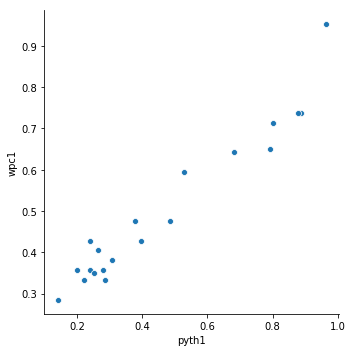

In [7]:
# Plot the data

sns.relplot(x="pyth1", y="wpc1", data =Half1)

In [8]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc1 ~ pyth1', data=Half1).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wpc1   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.81e-12
Time:                        20:14:45   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth1          0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [9]:
Half2 = EPL18[EPL18.Date > 20180000]
Half2h= Half2.groupby('HomeTeam')[['hwin','FTHG','FTAG','count']].sum().reset_index()
Half2h= Half2h.rename(columns = {'HomeTeam':'team', 'FTHG':'FTHG2h', 'FTAG':'FTAG2h', 'count':'P2h'})
Half2a = Half2.groupby('AwayTeam')[['awin','FTHG','FTAG','count']].sum().reset_index()
Half2a =Half2a.rename(columns = {'AwayTeam':'team', 'FTHG':'FTHG2a', 'FTAG':'FTAG2a', 'count':'P2a'})

## Step 7 (=Step 5 (away team))

In [10]:
Half2 = pd.merge(Half2h, Half2a, on ='team')
Half2

,team,hwin,FTHG2h,FTAG2h,P2h,awin,FTHG2a,FTAG2a,P2a
0,Arsenal,7.5,29,10,9,1.0,15,7,8
1,Bournemouth,5.0,12,13,8,4.0,16,13,9
2,Brighton,5.5,14,13,9,1.5,16,5,8
3,Burnley,3.5,9,11,9,4.0,11,9,8
4,Chelsea,4.5,9,9,8,4.5,15,14,9
5,Crystal Palace,4.5,15,9,8,4.5,14,12,9
6,Everton,5.5,11,9,9,2.5,17,8,8
7,Huddersfield,2.5,6,13,8,2.5,13,4,9
8,Leicester,5.0,12,8,9,2.5,20,13,8
9,Liverpool,7.0,24,6,8,5.0,8,12,9


## Step 7 (=Step 6 (away team))

In [11]:
Half2['W2'] = Half2['hwin'] + Half2['awin']
Half2['G2'] = Half2['P2h'] + Half2['P2a']
Half2['GF2'] = Half2['FTHG2h'] + Half2['FTAG2a']
Half2['GA2'] = Half2['FTAG2h'] + Half2['FTHG2a']
Half2['wpc2'] = Half2['W2'] / Half2['G2']
Half2['pyth2']= Half2['GF2']**2 / (Half2['GF2']**2 + Half2['GA2']**2)
Half2

,team,hwin,FTHG2h,FTAG2h,P2h,awin,FTHG2a,FTAG2a,P2a,W2,G2,GF2,GA2,wpc2,pyth2
0,Arsenal,7.5,29,10,9,1.0,15,7,8,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,5.0,12,13,8,4.0,16,13,9,9.0,17,25,29,0.529412,0.426330
2,Brighton,5.5,14,13,9,1.5,16,5,8,7.0,17,19,29,0.411765,0.300333
3,Burnley,3.5,9,11,9,4.0,11,9,8,7.5,17,18,22,0.441176,0.400990
4,Chelsea,4.5,9,9,8,4.5,15,14,9,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,4.5,15,9,8,4.5,14,12,9,9.0,17,27,23,0.529412,0.579491
6,Everton,5.5,11,9,9,2.5,17,8,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,2.5,6,13,8,2.5,13,4,9,5.0,17,10,26,0.294118,0.128866
8,Leicester,5.0,12,8,9,2.5,20,13,8,7.5,17,25,28,0.441176,0.443577
9,Liverpool,7.0,24,6,8,5.0,8,12,9,12.0,17,36,14,0.705882,0.868633


## Optional steps, not required for Assessment
### (Uncomment to run)

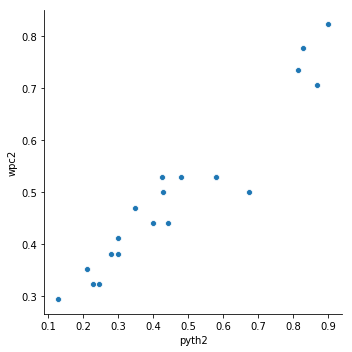

In [12]:
# Plot the data

sns.relplot(x="pyth2", y="wpc2", data =Half2)

In [13]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc2 ~ pyth2', data=Half2).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wpc2   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           5.02e-11
Time:                        20:14:46   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth2          0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [14]:
EPL1718 = pd.merge(Half1, Half2, on ='team')
EPL1718

,team,hwin_x,FTHG1h,FTAG1h,P1h,awin_x,FTHG1a,FTAG1a,P1a,W1,...,awin_y,FTHG2a,FTAG2a,P2a,W2,G2,GF2,GA2,wpc2,pyth2
0,Arsenal,8.5,25,10,10,5.0,16,13,11,13.5,...,1.0,15,7,8,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,4.5,14,17,11,3.0,15,6,10,7.5,...,4.0,16,13,9,9.0,17,25,29,0.529412,0.426330
2,Brighton,5.5,10,12,10,3.0,13,5,11,8.5,...,1.5,16,5,8,7.0,17,19,29,0.411765,0.300333
3,Burnley,6.0,7,6,10,6.5,11,11,11,12.5,...,4.0,11,9,8,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8.5,21,7,11,7.0,7,18,10,15.5,...,4.5,15,14,9,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,5.0,14,18,11,2.5,14,4,10,7.5,...,4.5,14,12,9,9.0,17,27,23,0.529412,0.579491
6,Everton,6.5,17,13,10,3.5,19,8,11,10.0,...,2.5,17,8,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,6.0,10,12,11,3.0,20,8,10,9.0,...,2.5,13,4,9,5.0,17,10,26,0.294118,0.128866
8,Leicester,5.0,13,14,10,5.0,18,18,11,10.0,...,2.5,20,13,8,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8.5,21,4,11,6.5,20,27,10,15.0,...,5.0,8,12,9,12.0,17,36,14,0.705882,0.868633


## Step 9

In [15]:
keyvars = EPL1718[['team','wpc2','wpc1', 'pyth1', 'pyth2']]
keyvars.corr()

,wpc2,wpc1,pyth1,pyth2
wpc2,1.000000,0.756573,0.795693,0.955986
wpc1,0.756573,1.000000,0.968204,0.745832
pyth1,0.795693,0.968204,1.000000,0.795331
pyth2,0.955986,0.745832,0.795331,1.000000


## Optional steps, not required for Assessment
### (Uncomment to run)

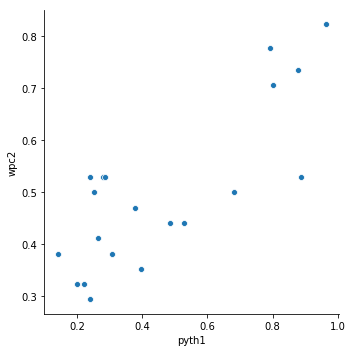

In [16]:
sns.relplot(x="pyth1", y="wpc2", data = EPL1718)

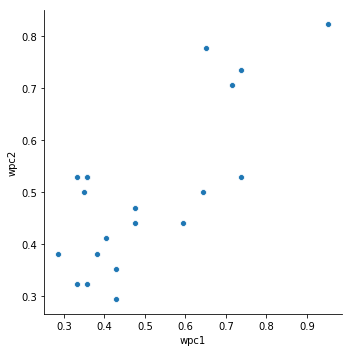

In [17]:
sns.relplot(x="wpc1", y="wpc2", data = EPL1718)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?